# CDJ Project: Social Security

This file is used to produce figure 1. A bar chart illustrating net changes to Social Security's Trust Fund from 1937 to 2035. Recorded data from 1937 to 2023 (inclusive). A linear regression project is made from 2024 to 2035 (inclusive). This barchart includes both recorded and projected.

Data from: https://www.ssa.gov/oact/STATS/table4a1.html and https://www.ssa.gov/oact/STATS/table4a2.html

In [1]:
#Import Standard Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [74]:
df_assets = pd.read_excel("OASI_and_DI_Data.xlsx", index_col = 0) #Load Excel Data
df_assets.fillna(0, inplace = True) #Replace empty entires with 0 in order to sum

In [112]:
df_assets["OASDI_Trust_Fund_Net_Increase"] = df_assets["OASI Asset Net Increase During Year"] + df_assets["DI Asset Net Increase"] #Combining OASI and DI. The added creates the OASDI (Trust Fund)

In [78]:
df_assets 
#view data set containing values from 1937 to 2023. 
#Important Columns is df_assets.index and df_assets["OASDI_Trust_Fund_Net_Increase"]

,OASI Total Income,OASI Total Cost,OASI Asset Net Increase During Year,Asset Reserves at end of year,DI Total Income,DI Total Cost,DI Asset Net Increase,DI Asset Reserves at end of year,Unnamed: 9,OASDI_Trust_Fund_Net_Increase
Calendar Year,,,,,,,,,,
1937,767,1,766,766,0.0,0.0,0.0,0.0,0.0,766.0
1938,375,10,366,1132,0.0,0.0,0.0,0.0,0.0,366.0
1939,607,14,592,1724,0.0,0.0,0.0,0.0,0.0,592.0
1940,368,62,306,2031,0.0,0.0,0.0,0.0,0.0,306.0
1941,845,114,731,2762,0.0,0.0,0.0,0.0,0.0,731.0
...,...,...,...,...,...,...,...,...,...,...
2019,917873,911423,6450,2804322,2019.0,143901.0,147876.0,-3974.0,93083.0,154326.0
2020,968348,960954,7394,2811716,2020.0,149748.0,146260.0,3488.0,96570.0,153654.0
2021,942856,1001936,-59080,2752636,2021.0,145470.0,142646.0,2824.0,99394.0,83566.0


In [114]:
#GOAL: Append df_assets with projected data (using sklearn linear regression)

start_year = 2010 #Start year of projection. This year was chosen since it marks the beginning of negative slope.

#X is the predictor variable (Years), y is response variable (OASDI Trust Fund Net Increase, can be negative)
X = df_assets.index.to_frame(index = True).loc[start_year:2023] #Creating a 1 column dataframe with all years present in df_assets [1937,2023]
y = df_assets["OASDI_Trust_Fund_Net_Increase"].loc[start_year:2023] #Creating a 1 column data frame from years [1937,2023] of OASDI Values. 

#Running sklearn's LinearRegression Function
reg = LinearRegression().fit(X,y) #fitting data
reg.coef_ #extract regression coefficient
reg.intercept_ #extract intercept constant

#Predicting using the reg fit
end_year = 2035 #Predicting until 2035, inclusive.

pred_vals = reg.predict(np.arange(2024, end_year+1).reshape(-1,1)) #Create array with predicted values for [2024, 2035] inclusive

#Convert pred_vals array into dataframe
pred_df = pd.DataFrame({
    "Year": range(2024, end_year+1),
    "pred_vals": pred_vals
}) 

pred_df.set_index("Year", inplace = True) #set index as year

#Ammending df_assets dataframe to include predicted values from 2024 to 2035 inclusive
df_assets = pd.concat([df_assets, pred_df])
df_assets["Year"] = df_assets.index

df_assets #Preview df_assets. df_assets is now ready for figure creation.

,OASI Total Income,OASI Total Cost,OASI Asset Net Increase During Year,Asset Reserves at end of year,DI Total Income,DI Total Cost,DI Asset Net Increase,DI Asset Reserves at end of year,Unnamed: 9,OASDI,pred_vals,Year,OASDI_Trust_Fund_Net_Increase
1937,767.0,1.0,766.0,766.0,0.0,0.0,0.0,0.0,0.0,766.0,NaN,1937,766.0
1938,375.0,10.0,366.0,1132.0,0.0,0.0,0.0,0.0,0.0,366.0,NaN,1938,366.0
1939,607.0,14.0,592.0,1724.0,0.0,0.0,0.0,0.0,0.0,592.0,NaN,1939,592.0
1940,368.0,62.0,306.0,2031.0,0.0,0.0,0.0,0.0,0.0,306.0,NaN,1940,306.0
1941,845.0,114.0,731.0,2762.0,0.0,0.0,0.0,0.0,0.0,731.0,NaN,1941,731.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-593.767033,2031,NaN
2032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-12046.716484,2032,NaN
2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-23499.665934,2033,NaN
2034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-34952.615385,2034,NaN


([<matplotlib.axis.XTick at 0x3308dc410>,
 [Text(1937, 0, '1937'),
  Text(1943, 0, '1943'),
  Text(1949, 0, '1949'),
  Text(1955, 0, '1955'),
  Text(1961, 0, '1961'),
  Text(1967, 0, '1967'),
  Text(1973, 0, '1973'),
  Text(1979, 0, '1979'),
  Text(1985, 0, '1985'),
  Text(1991, 0, '1991'),
  Text(1997, 0, '1997'),
  Text(2003, 0, '2003'),
  Text(2009, 0, '2009'),
  Text(2015, 0, '2015'),
  Text(2021, 0, '2021'),
  Text(2027, 0, '2027'),
  Text(2033, 0, '2033')])

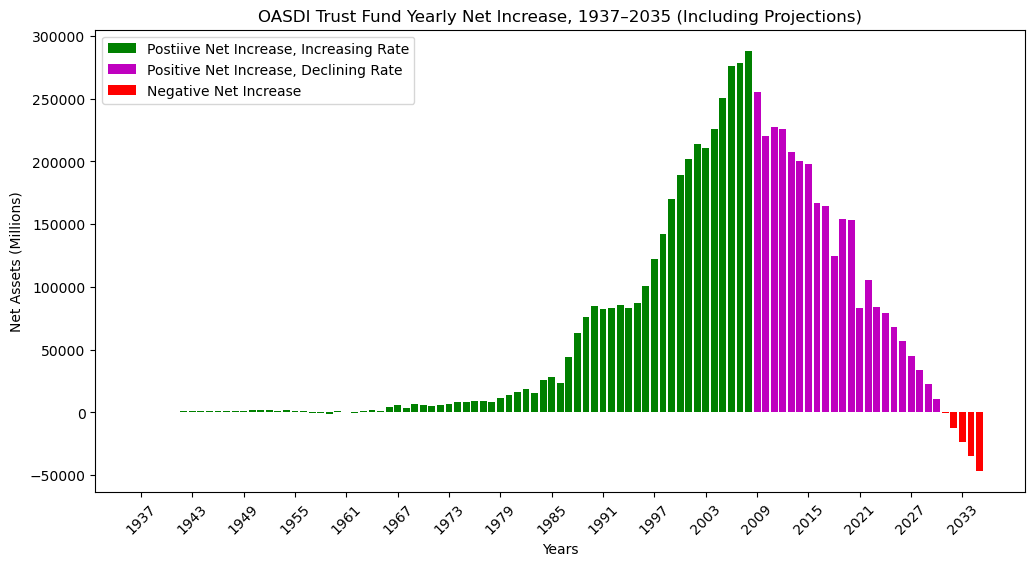

In [249]:
# "OASDI_Trust_Fund_Net_Increase" and "pred_vals" are the column names from df_assets to plot for y values

plt.figure(figsize=(12, 6))

#Filter df_asset ROWS by desired years. 
#----There are three groups to illustrate (1) Positive Net Increase, (2) Decreasing Positive Net Increase (3) Negative Net Increase
before_2010 = df_assets[df_assets['Year'] < 2009]
between_2010_and_2023 = df_assets[(df_assets['Year'] >= 2009) & (df_assets['Year'] <= 2023)]
between_2024_and_2030 = df_assets[(df_assets['Year'] >= 2024) & (df_assets['Year'] <= 2030)]
after_2030 = df_assets[df_assets['Year'] > 2030]

#Plotting. Note to WebDev: EDIT COLORS AND STYLE
plt.bar(before_2010["Year"], before_2010["OASDI_Trust_Fund_Net_Increase"], color = "g", label = "Postiive Net Increase, Increasing Rate") #green color PLACEHOLDER for (1) Positive Net Increase
plt.bar(between_2010_and_2030["Year"], between_2010_and_2030["OASDI_Trust_Fund_Net_Increase"], color = "m") #magenta color PLACEHOLDER for (2) Decreasing Positive Net Increase
plt.bar(between_2024_and_2030["Year"], between_2024_and_2030["pred_vals"], color = "m", label = "Positive Net Increase, Declining Rate") #magenta color PLACEHOLDER for (2) Decreasing Positive Net Increase
plt.bar(after_2030["Year"],after_2030["pred_vals"], color = "red", label = "Negative Net Increase") #red color PLACEHOLDER for (3) Negative Net Increase

plt.legend()
plt.xlabel("Years")
plt.ylabel("Net Assets (Millions)")
plt.title("OASDI Trust Fund Yearly Net Increase, 1937–2035 (Including Projections)")
plt.xticks(range(1937, 2035, 6), rotation = 45)

